In [7]:
import sys
!{sys.executable} -m pip install pandas-profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27090 sha256=af6fa9300f74737c85c7ffc327c86c9cb9fa5b21e53322099c486a0d56a66914
  Stored in directory: c:\users\gugli\appdata\local\pip\cache\wheels\70\e1\52\5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295204 sha256=e84ef1c1d93436a67cea6bc7704a399eb0dd88b1e7f1b1f6483f5309f0a13bb3
  Stored in directory: c:\users\gugli\appdata\local\pip\cache\wheels\4c\d5\59\5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 1.1.0
    Uninstalling MarkupSafe-1.1.0:
      Successfully uninstalled MarkupSafe-1.1.0
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.10
    Uninstalling Jinja2-2.10:
      Successfully uninstalled Jinja2-2.10
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.44.1


ERROR: jupyterlab 1.2.6 has requirement jupyterlab_server~=1.0.0, but you'll have jupyterlab-server 1.1.0 which is incompatible.
ERROR: phik 0.12.0 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.


In [20]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

In [56]:
## USD_INR Historical Data Data Import

data = pd.read_csv("USD_INR Historical Data.csv",sep=',')

In [57]:
data.shape

(2608, 6)

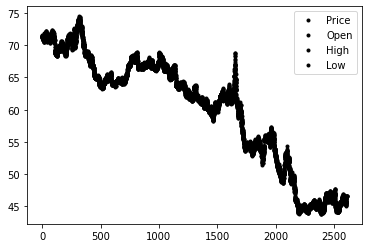

array([[<AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

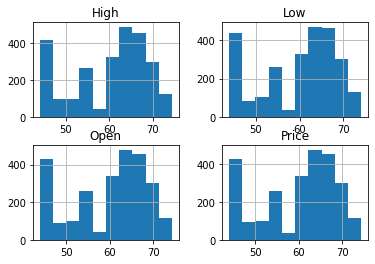

In [58]:
data.plot(style='k.')
pyplot.show()
data.hist()

In [59]:
## 6 variables - 5 input and 1 output variable (price)
## 2608 observations
## Data from Jan 01, 2010 to Dec 31, 2019

In [60]:
data.head()

,Date,Price,Open,High,Low,Change %
0,"Dec 31, 2019",71.35,71.295,71.385,71.225,0.06%
1,"Dec 30, 2019",71.31,71.340,71.427,71.290,-0.18%
2,"Dec 27, 2019",71.44,71.315,71.505,71.175,0.21%
3,"Dec 26, 2019",71.29,71.270,71.348,71.225,0.01%
4,"Dec 25, 2019",71.28,71.280,71.280,71.280,0.01%


In [61]:
data.tail()

,Date,Price,Open,High,Low,Change %
2603,"Jan 07, 2010",45.650,45.610,45.890,45.570,-0.10%
2604,"Jan 06, 2010",45.695,46.165,46.205,45.695,-1.10%
2605,"Jan 05, 2010",46.205,46.305,46.305,46.045,-0.19%
2606,"Jan 04, 2010",46.295,46.545,46.655,46.245,-0.69%
2607,"Jan 01, 2010",46.615,46.610,46.677,46.590,0.44%


In [62]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64

In [63]:
data.isnull().values.any()

False

In [64]:
ProfileReport(data)

ImportError: cannot import name 'GridspecLayout' from 'ipywidgets' (C:\Users\gugli\AppData\Roaming\Python\Python37\site-packages\ipywidgets\__init__.py)

In [65]:
data_new = data.iloc[::-1].reset_index(drop=True)

In [66]:
data_new.head()

,Date,Price,Open,High,Low,Change %
0,"Jan 01, 2010",46.615,46.610,46.677,46.590,0.44%
1,"Jan 04, 2010",46.295,46.545,46.655,46.245,-0.69%
2,"Jan 05, 2010",46.205,46.305,46.305,46.045,-0.19%
3,"Jan 06, 2010",45.695,46.165,46.205,45.695,-1.10%
4,"Jan 07, 2010",45.650,45.610,45.890,45.570,-0.10%


In [67]:
data_new['Change %'] = data_new['Change %'].replace({'%':''}, regex=True)

In [68]:
data_new['Change %'] = data_new['Change %'].astype(float)

In [69]:
"""
Lag features
To make a lag feature we shift the observations of the target series so that they appear to have occured later in time. Here we've created a 1-step lag feature, though shifting by multiple steps is possible too.

"""

data_new['Lag_1'] = data_new['Change %'].shift()
data_new = data_new.dropna()
data_new.head()

,Date,Price,Open,High,Low,Change %,Lag_1
1,"Jan 04, 2010",46.295,46.545,46.655,46.245,-0.69,0.44
2,"Jan 05, 2010",46.205,46.305,46.305,46.045,-0.19,-0.69
3,"Jan 06, 2010",45.695,46.165,46.205,45.695,-1.10,-0.19
4,"Jan 07, 2010",45.650,45.610,45.890,45.570,-0.10,-1.10
5,"Jan 08, 2010",45.470,45.680,45.900,45.470,-0.39,-0.10


In [70]:
## Test Train Split

In [71]:
data_new.iloc[2085,:]

Date        Jan 01, 2018
Price              63.68
Open              63.855
High              63.865
Low               63.635
Change %           -0.25
Lag_1              -0.37
Name: 2086, dtype: object

In [72]:
## All data till Jan 01 2018 will be train data

train = data_new.iloc[:2085,:]

In [73]:
train.tail()

,Date,Price,Open,High,Low,Change %,Lag_1
2081,"Dec 25, 2017",64.02,64.020,64.020,64.020,0.00,0.00
2082,"Dec 26, 2017",64.05,64.040,64.125,64.028,0.05,0.00
2083,"Dec 27, 2017",64.12,64.075,64.185,64.075,0.11,0.05
2084,"Dec 28, 2017",64.08,64.130,64.280,64.078,-0.06,0.11
2085,"Dec 29, 2017",63.84,64.055,64.070,63.790,-0.37,-0.06


In [74]:
test = data_new.iloc[2085:,:]

In [75]:
test.head()

,Date,Price,Open,High,Low,Change %,Lag_1
2086,"Jan 01, 2018",63.680,63.855,63.865,63.635,-0.25,-0.37
2087,"Jan 02, 2018",63.460,63.700,63.770,63.440,-0.35,-0.25
2088,"Jan 03, 2018",63.505,63.555,63.575,63.450,0.07,-0.35
2089,"Jan 04, 2018",63.400,63.595,63.615,63.365,-0.17,0.07
2090,"Jan 05, 2018",63.340,63.360,63.425,63.323,-0.09,-0.17


In [76]:
x_train = train.loc[:,['Lag_1']]
x_test = test.loc[:,['Lag_1']]

y_train = train.loc[:,'Change %']
y_test = test.loc[:,'Change %']

In [77]:
x_train.head()

,Lag_1
1,0.44
2,-0.69
3,-0.19
4,-1.10
5,-0.10


In [78]:
## Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
y_pred = model.predict(x_test)

In [80]:
## Time Series Analysis

In [91]:
import sys
!{sys.executable} -m pip install statsmodels

In [92]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.api import qqplot

<AxesSubplot:title={'center':'INR'}>

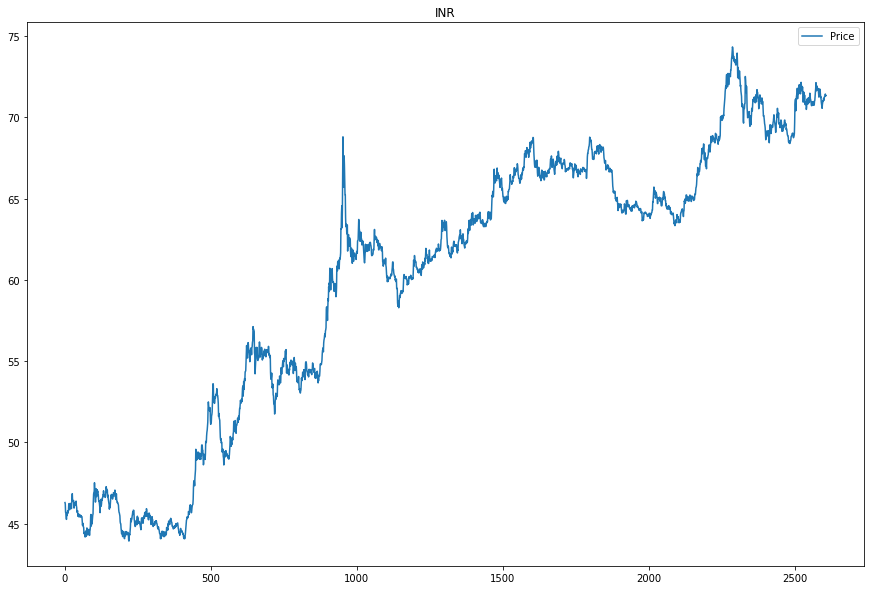

In [93]:
data_new.Price.plot(figsize=[15,10],title='INR',legend=True)

In [94]:
data_1 = data_new[['Date','Price']]

In [95]:
data_1.dtypes

Date      object
Price    float64
dtype: object

In [96]:
from datetime import datetime

def date_convert(date_to_convert):
     return datetime.strptime(date_to_convert, '%b %d, %Y').strftime('%m/%d/%Y')

data_1['Date'] = data_1['Date'].apply(date_convert)

C:\Users\gugli\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
data_1.dtypes

Date      object
Price    float64
dtype: object

In [98]:
data_1 = data_1.set_index(['Date'])

In [99]:
data_1

,Price
Date,
01/04/2010,46.295
01/05/2010,46.205
01/06/2010,45.695
01/07/2010,45.650
01/08/2010,45.470
...,...
12/25/2019,71.280
12/26/2019,71.290
12/27/2019,71.440


<AxesSubplot:xlabel='Date'>

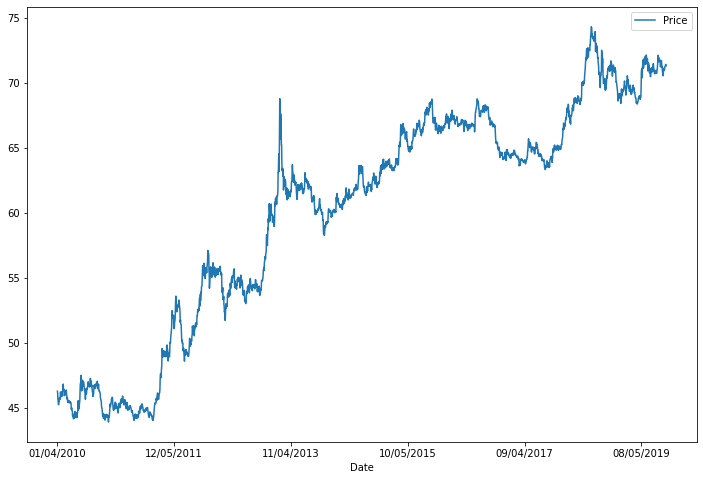

In [47]:
## Plot

data_1.plot(figsize=(12,8))

In [89]:
## We can see an upward trend meaning the conversion rate has increased over lat 9 years

C:\Users\gugli\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


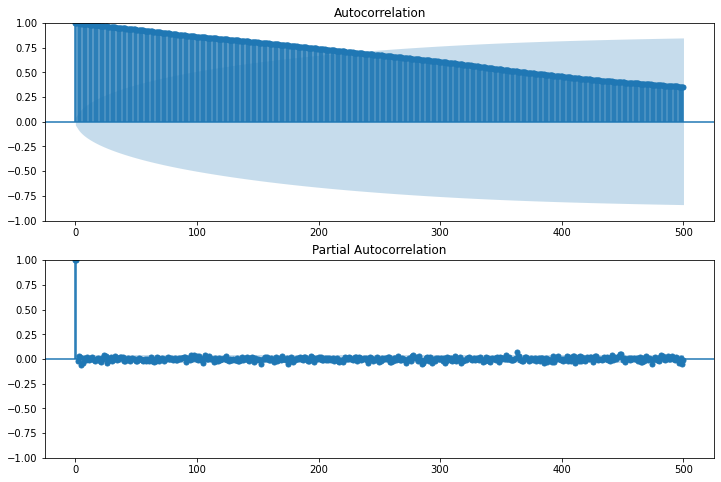

In [100]:
## ACF and PACF plots

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_1.values.squeeze(), lags=500, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_1, lags=500, ax=ax2)

In [ ]:
## p = 1
#If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, 
#then use one autoregressive (p)parameter
## q =1
# If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, 
#then use one autoregressive (p) and one moving average (q) parameter.
"""
Stationarity means that the time series does not have a trend, has a constant variance, 
a constant autocorrelation pattern, and no seasonal pattern. The autocorrelation function declines to 
near zero rapidly for a stationary time series. In contrast, the ACF drops slowly for a non-stationary time series.
"""

## This times series is non-stationary

In [101]:
## Durbin -Watson stats

sm.stats.durbin_watson(data_1)

#Positive serial correlation is associated with DW values below 2

array([2.025923e-05])

C:\Users\gugli\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

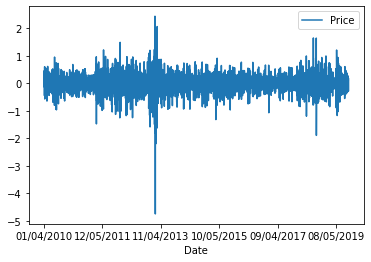

In [104]:
## First order differencing to make time series data stationary

data_1['Price'] = data_1['Price'].diff()
data_1.plot()

C:\Users\gugli\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
C:\Users\gugli\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


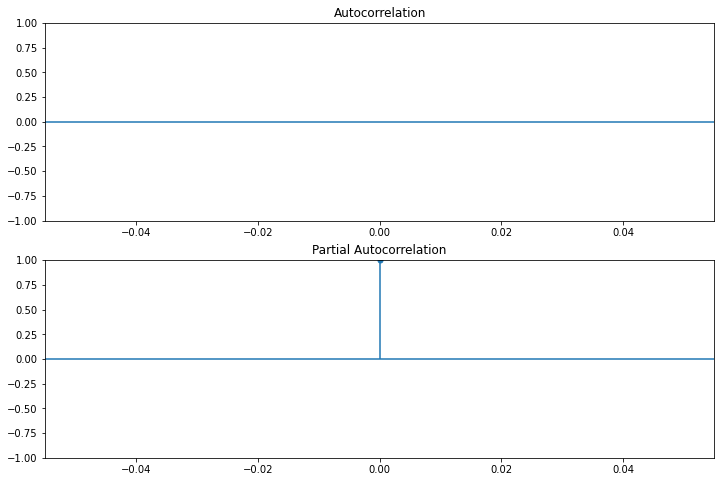

In [105]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_1.values.squeeze(), lags=500, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_1, lags=500, ax=ax2)

In [79]:
# Train and test split

train = data_1.iloc[:2085,:]
train.tail()



,Price
Date,
12/25/2017,64.02
12/26/2017,64.05
12/27/2017,64.12
12/28/2017,64.08
12/29/2017,63.84


In [80]:
test = data_1.iloc[2086:,:]
test.head()

,Price
Date,
01/02/2018,63.460
01/03/2018,63.505
01/04/2018,63.400
01/05/2018,63.340
01/08/2018,63.475


In [81]:
## ARMA model (p=1,q=0)

model_1 = sm.tsa.ARMA(train['Price'], (1,0)).fit()
print(model_1.params)

const          55.997039
ar.L1.Price     0.999483
dtype: float64


/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency i

In [82]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2085
Model:                     ARMA(1, 0)   Log Likelihood                -261.991
Method:                       css-mle   S.D. of innovations              0.274
Date:                Wed, 01 Dec 2021   AIC                            529.983
Time:                        01:53:49   BIC                            546.911
Sample:                    01-04-2010   HQIC                           536.185
                         - 12-29-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.9970      6.890      8.127      0.000      42.492      69.502
ar.L1.Price     0.9995      0.001   1926.275      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
-----------------------------------------------------------------------------
"""

In [84]:
## ARMA model (p=1,q=1)

model_2 = sm.tsa.ARMA(train['Price'], (1,1)).fit()
print(model_2.params)

/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency i

const          56.044437
ar.L1.Price     0.999438
ma.L1.Price     0.040844
dtype: float64


In [85]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2085
Model:                     ARMA(1, 1)   Log Likelihood                -260.633
Method:                       css-mle   S.D. of innovations              0.274
Date:                Wed, 01 Dec 2021   AIC                            529.266
Time:                        01:53:58   BIC                            551.836
Sample:                    01-04-2010   HQIC                           537.535
                         - 12-29-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          56.0444      6.775      8.272      0.000      42.765      69.324
ar.L1.Price     0.9994      0.001   1809.115      0.000       0.998       1.001
ma.L1.Price     0.0408      0.025      1.654      0.098      -0.008       0.089
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
MA.1          -24.4834           +0.0000j           24.4834            0.5000
-----------------------------------------------------------------------------
"""

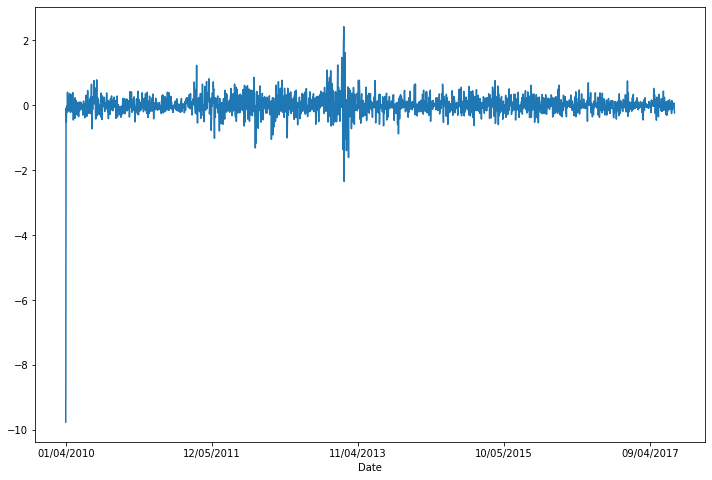

In [86]:
## Plots

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = model_2.resid.plot(ax=ax);

In [92]:
## Predictions

# Next 15 days predictions

pred= model_2.forecast(steps=521)[0]
a = pd.DataFrame(pred)

In [87]:
test.shape

(521, 1)

In [89]:
from sklearn.metrics import mean_squared_error

rmse_model_2 = np.sqrt(mean_squared_error(test,pred))

In [90]:
rmse_model_2

7.258184913093357

In [95]:
## ARIMA MODEL

from statsmodels.tsa.arima_model import ARIMA

arima_1= ARIMA(train,order=(1,1,1)).fit()

/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/hariprasadrajendran/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning

In [96]:
arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 2084
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -253.618
Method:                       css-mle   S.D. of innovations              0.273
Date:                Wed, 01 Dec 2021   AIC                            515.236
Time:                        02:02:18   BIC                            537.804
Sample:                    01-05-2010   HQIC                           523.505
                         - 12-29-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0084      0.006      1.352      0.176      -0.004       0.021
ar.L1.D.Price    -0.4186      0.154     -2.720      0.007      -0.720      -0.117
ma.L1.D.Price     0.4755      0.148      3.208      0.001       0.185       0.766
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.3890           +0.0000j            2.3890            0.5000
MA.1           -2.1032           +0.0000j            2.1032            0.5000
-----------------------------------------------------------------------------
"""

In [97]:
arima_pred = arima_1.forecast(steps=521)[0]
b = pd.DataFrame(arima_pred)

In [99]:
from sklearn.metrics import mean_squared_error

rmse_arima_1 = np.sqrt(mean_squared_error(test,arima_pred))
rmse_arima_1

3.9168402781727814